In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df3= pd.read_csv('income_cases_2.csv')

### The following code displays the merged dataset datatypes.

In [3]:
df3.dtypes

Unnamed: 0                          int64
OBJECTID                            int64
GEOID10                             int64
County                              int64
Area_Name                          object
Total_Population                    int64
Total_Population_MOE_2016           int64
Total_households                    int64
Total_households_MOE                int64
HH_income_less_35k                  int64
HH_income_less_35k_MOE              int64
Pct_HH_income_less_35k            float64
Pct_HH_income_less_35k_MOE        float64
HH_income_35k_75k                   int64
HH_income_35k_75k_MOE               int64
Pct_HH_income_35k_75k             float64
Pct_HH_income_35k_75k_MOE         float64
HH_income_75k_200k                  int64
HH_income_75k_200k_MOE              int64
Pct_HH_income_75k_200k            float64
Pct_HH_income_75k_200k_MOE        float64
HH_income_200k_more                 int64
HH_income_200k_more_MOE             int64
Pct_HH_income_200k_more           

### The following code displays statistics from the merged dataset.

In [4]:
df3.describe()

,Unnamed: 0,OBJECTID,GEOID10,County,Total_Population,Total_Population_MOE_2016,Total_households,Total_households_MOE,HH_income_less_35k,HH_income_less_35k_MOE,...,cases,State FIPS code,County FIPS code,population,hospitalization,deaths,case rate,death rate,14 day case rate,14 day cases
count,944.000000,944.000000,9.440000e+02,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,...,944.000000,944.0,944.000000,9.440000e+02,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,473.542373,474.527542,1.311068e+10,13110.601695,5929.840042,538.310381,2099.554025,138.206568,606.118644,172.100636,...,18201.776483,13.0,110.601695,6.457978e+05,1663.019068,340.504237,2766.199089,53.188146,149.616886,942.792373
std,274.154848,274.155526,5.132188e+07,51.361219,2905.633562,249.760785,969.580036,63.214046,371.646654,82.925790,...,11176.196479,0.0,51.361219,3.819744e+05,1030.532913,210.006681,583.803999,13.146943,37.454588,566.616191
min,0.000000,1.000000,1.301318e+10,13013.000000,1070.000000,18.000000,0.000000,13.000000,0.000000,32.000000,...,1576.000000,13.0,13.000000,6.911000e+04,128.000000,40.000000,1806.130000,20.990000,92.150000,113.000000
25%,235.750000,236.750000,1.306703e+10,13067.000000,3965.250000,359.750000,1433.250000,93.000000,327.750000,108.000000,...,6163.000000,13.0,67.000000,2.398660e+05,464.000000,102.000000,2653.840000,45.510000,129.400000,359.000000
50%,474.500000,475.500000,1.311713e+10,13117.000000,5428.500000,493.500000,1944.500000,128.000000,533.500000,159.000000,...,21049.000000,13.0,117.000000,7.905880e+05,1964.000000,397.000000,2759.210000,56.310000,149.670000,1023.000000
75%,710.250000,711.250000,1.313505e+10,13135.000000,7351.000000,658.500000,2598.750000,172.000000,799.250000,221.250000,...,30383.000000,13.0,135.000000,9.711450e+05,2594.000000,454.000000,2813.550000,57.430000,153.220000,1488.000000
max,947.000000,948.000000,1.329711e+10,13297.000000,25316.000000,2007.000000,7287.000000,457.000000,2714.000000,757.000000,...,30926.000000,13.0,297.000000,1.099181e+06,2868.000000,619.000000,5139.350000,89.710000,336.730000,1648.000000


### The code in the following cells normalizes the data by population and displays the result.

In [5]:
#df3[["deaths","Total_Population"]] = scaler.fit_transform(df3[["deaths","Total_Population"]])
death_norm_list=df3["deaths"]/df3["Total_Population"]
df3.describe()

,Unnamed: 0,OBJECTID,GEOID10,County,Total_Population,Total_Population_MOE_2016,Total_households,Total_households_MOE,HH_income_less_35k,HH_income_less_35k_MOE,...,cases,State FIPS code,County FIPS code,population,hospitalization,deaths,case rate,death rate,14 day case rate,14 day cases
count,944.000000,944.000000,9.440000e+02,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,...,944.000000,944.0,944.000000,9.440000e+02,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,473.542373,474.527542,1.311068e+10,13110.601695,5929.840042,538.310381,2099.554025,138.206568,606.118644,172.100636,...,18201.776483,13.0,110.601695,6.457978e+05,1663.019068,340.504237,2766.199089,53.188146,149.616886,942.792373
std,274.154848,274.155526,5.132188e+07,51.361219,2905.633562,249.760785,969.580036,63.214046,371.646654,82.925790,...,11176.196479,0.0,51.361219,3.819744e+05,1030.532913,210.006681,583.803999,13.146943,37.454588,566.616191
min,0.000000,1.000000,1.301318e+10,13013.000000,1070.000000,18.000000,0.000000,13.000000,0.000000,32.000000,...,1576.000000,13.0,13.000000,6.911000e+04,128.000000,40.000000,1806.130000,20.990000,92.150000,113.000000
25%,235.750000,236.750000,1.306703e+10,13067.000000,3965.250000,359.750000,1433.250000,93.000000,327.750000,108.000000,...,6163.000000,13.0,67.000000,2.398660e+05,464.000000,102.000000,2653.840000,45.510000,129.400000,359.000000
50%,474.500000,475.500000,1.311713e+10,13117.000000,5428.500000,493.500000,1944.500000,128.000000,533.500000,159.000000,...,21049.000000,13.0,117.000000,7.905880e+05,1964.000000,397.000000,2759.210000,56.310000,149.670000,1023.000000
75%,710.250000,711.250000,1.313505e+10,13135.000000,7351.000000,658.500000,2598.750000,172.000000,799.250000,221.250000,...,30383.000000,13.0,135.000000,9.711450e+05,2594.000000,454.000000,2813.550000,57.430000,153.220000,1488.000000
max,947.000000,948.000000,1.329711e+10,13297.000000,25316.000000,2007.000000,7287.000000,457.000000,2714.000000,757.000000,...,30926.000000,13.0,297.000000,1.099181e+06,2868.000000,619.000000,5139.350000,89.710000,336.730000,1648.000000


In [6]:
low_income_norm_list = df3["HH_income_less_35k"]/df3["Total_Population"]
print(low_income_norm_list)

0      0.232710
1      0.353199
2      0.133736
3      0.277824
4      0.191961
         ...   
939    0.024423
940    0.107178
941    0.097302
942    0.066429
943    0.059093
Length: 944, dtype: float64


### The following code assigns the x-value for the plots.

In [7]:

x=low_income_norm_list



### The following code assigns the y-value for the plots.

In [8]:

y= death_norm_list


### The following code forces the two lists into arrays.

In [9]:
d_norm = np.array(death_norm_list)
li_norm = np.array(low_income_norm_list)


### The following code cells shape the new arrays.

In [10]:
np.shape(d_norm)

(944,)

In [11]:
np.shape(li_norm)

(944,)

### The following code correlates the arrays.

In [12]:
np.correlate(d_norm,li_norm)

array([9.94798523])

### The following code finds the correlation coefficients of the arrays.

In [13]:
corrcoef= np.corrcoef(d_norm,li_norm)
print(corrcoef)

[[1.         0.38340791]
 [0.38340791 1.        ]]


### The following code performs a linear regression, displays the slope, intercept, and standard error. 

In [14]:
result = scipy.stats.linregress(x, y)
print(result.slope)

0.4746554664989721


In [15]:
print(result.intercept)

0.024702441017969416


In [16]:
print(result.stderr)

0.03725341367352298


### The following code creates a scatter plot from the arrays.

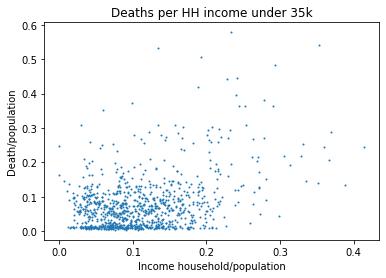

In [17]:
plt.clf()
plt.plot(low_income_norm_list,death_norm_list,"o",markersize=1)

# Set the x axis label of the current axis.
plt.xlabel('Income household/population')
# Set the y axis label of the current axis.
plt.ylabel('Death/population')

# Set a title 
plt.title('Deaths per HH income under 35k')
# Display the figure.
plt.show()

### The code in the following cells normalizes the data by population and displays the result.

In [18]:
low_income3575_norm_list = df3["HH_income_35k_75k"]/df3["Total_Population"]
print(low_income3575_norm_list)

0      0.190654
1      0.128834
2      0.119068
3      0.210879
4      0.108285
         ...   
939    0.083592
940    0.121217
941    0.147024
942    0.115830
943    0.095947
Length: 944, dtype: float64


### The following code assigns the x-value for the plots.

In [19]:
x=low_income3575_norm_list



### The following code assigns the y-value for the plots.

In [20]:
y= death_norm_list


### The following code forces the two lists into arrays.

In [21]:
d_norm = np.array(death_norm_list)
li3575_norm = np.array(low_income3575_norm_list)


### The following code cells shape the new arrays.

In [22]:
np.shape(d_norm)

(944,)

In [23]:
np.shape(li3575_norm)

(944,)

### The following code correlates the arrays.

In [24]:
np.correlate(d_norm,li3575_norm)

array([8.29827846])

### The following code finds the correlation coefficients of the arrays.

In [25]:
corrcoef= np.corrcoef(d_norm,li3575_norm)
print(corrcoef)

[[1.         0.00431208]
 [0.00431208 1.        ]]


### The following code performs a linear regression, displays the slope, intercept, and standard error. 

In [26]:
result = scipy.stats.linregress(x, y)
print(result.slope)

0.009302284491690316


In [27]:
print(result.intercept)

0.07637775064422275


In [28]:
print(result.stderr)

0.07028670777259527


### The following code creates a scatter plot from the arrays.

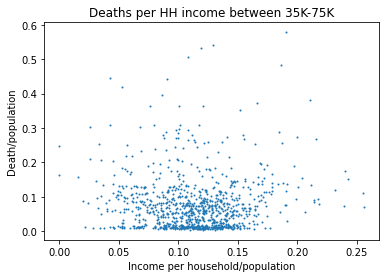

In [29]:
plt.clf()
plt.plot(low_income3575_norm_list,death_norm_list,"o",markersize=1)
# Set the x axis label of the current axis.
plt.xlabel('Income per household/population')
# Set the y axis label of the current axis.
plt.ylabel('Death/population')
#plt.legend()
# Set a title 
plt.title('Deaths per HH income between 35K-75K')
# Display the figure.
plt.show()

### The code in the following cells normalizes the data by population and displays the result.

In [30]:
himid_income75200_norm_list = df3["HH_income_75k_200k"]/df3["Total_Population"]
print(himid_income75200_norm_list)

0      0.062617
1      0.043821
2      0.045729
3      0.056904
4      0.023790
         ...   
939    0.161135
940    0.098165
941    0.087149
942    0.153549
943    0.106059
Length: 944, dtype: float64


### The following code assigns the x-value for the plots.

In [31]:
x=himid_income75200_norm_list


### The following code assigns the y-value for the plots.

In [32]:
y= death_norm_list


### The following code forces the two lists into arrays.

In [33]:
d_norm = np.array(death_norm_list)
hm75200_norm = np.array(himid_income75200_norm_list)


### The following code cells shape the new arrays.

In [34]:
np.shape(d_norm)

(944,)

In [35]:
np.shape(hm75200_norm)

(944,)

### The following code correlates the arrays.

In [36]:
np.correlate(d_norm,hm75200_norm)

array([7.73071831])

### The following code finds the correlation coefficients of the arrays.

In [37]:
corrcoef= np.corrcoef(d_norm,hm75200_norm)
print(corrcoef)

[[ 1.         -0.14486735]
 [-0.14486735  1.        ]]


### The following code performs a linear regression, displays the slope, intercept, and standard error. 

In [38]:
result = scipy.stats.linregress(x, y)
print(result.slope)

-0.21829054403118842


In [39]:
print(result.intercept)

0.10221328515562919


In [40]:
print(result.stderr)

0.04857728925473029


### The following code creates a scatter plot from the arrays.

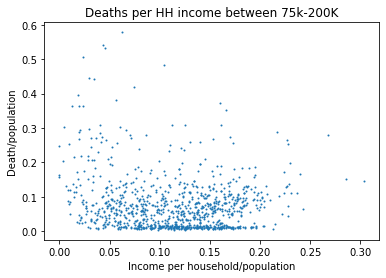

In [41]:
plt.clf()
plt.plot(himid_income75200_norm_list,death_norm_list,"o",markersize=1)
# Set the x axis label of the current axis.
plt.xlabel('Income per household/population')
# Set the y axis label of the current axis.
plt.ylabel('Death/population')
#plt.legend()
# Set a title 
plt.title('Deaths per HH income between 75k-200K')
# Display the figure.
plt.show()

### The code in the following cells normalizes the data by population and displays the result.

In [42]:
high_income200_norm_list = df3["HH_income_200k_more"]/df3["Total_Population"]
print(high_income200_norm_list)

0      0.004673
1      0.000000
2      0.000000
3      0.005858
4      0.000000
         ...   
939    0.018872
940    0.004042
941    0.013289
942    0.020592
943    0.026742
Length: 944, dtype: float64


### The following code assigns the x-value for the plots.

In [43]:
x=high_income200_norm_list



### The following code assigns the y-value for the plots.

In [44]:
y= death_norm_list


### The following code forces the two lists into arrays.

In [45]:
d_norm = np.array(death_norm_list)
high200_norm = np.array(high_income200_norm_list)


### The following code cells shape the new arrays.

In [46]:
np.shape(d_norm)

(944,)

In [47]:
np.shape(high200_norm)

(944,)

### The following code correlates the arrays.

In [48]:
np.correlate(d_norm,high200_norm)

array([2.10473818])

### The following code finds the correlation coefficients of the arrays.

In [49]:
corrcoef= np.corrcoef(d_norm,high200_norm)
print(corrcoef)

[[1.         0.13966499]
 [0.13966499 1.        ]]


### The following code performs a linear regression, displays the slope, intercept, and standard error. 

In [50]:
result = scipy.stats.linregress(x, y)
print(result.slope)

0.342930398904297


In [51]:
print(result.intercept)

0.06913276068662638


In [52]:
print(result.stderr)

0.07921645102909487


### The following code creates a scatter plot from the arrays.

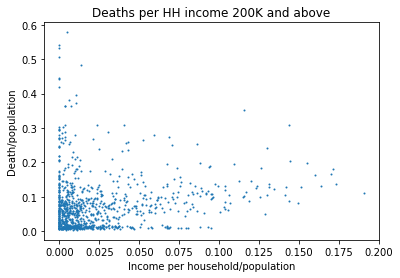

In [53]:
plt.clf()
plt.plot(high_income200_norm_list,death_norm_list,"o",markersize=1)
# Set the x axis label of the current axis.
plt.xlabel('Income per household/population')
# Set the y axis label of the current axis.
plt.ylabel('Death/population')
#plt.legend()
# Set a title 
plt.title('Deaths per HH income 200K and above')
# Display the figure.
plt.show()

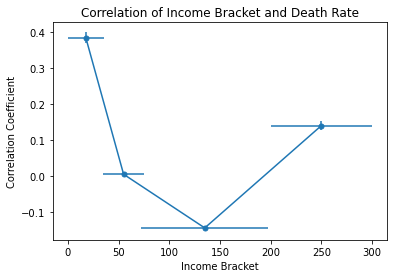

In [56]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html
x=[17.8,55,135,250]
xerr0=[17.8,20,62.5,50]
y=[0.38340791, 0.00431208, -0.14486735, 0.13966499]
avg_population=np.array([606.1186441, 669.4745763,688.5434322,135.4173729])  #average household count of each earning bracket
yerr0=abs(y*np.sqrt(avg_population)/(avg_population))  # y*error_percentatage, error_percentatage=sqrt(n)/n #percent uncertainty
plt.clf()
plt.errorbar(x,y,xerr=xerr0,yerr=yerr0,marker='o',markersize=5, label="1")
#plt.plot(X, y2,label="2")
# Set the x axis label of the current axis.
plt.xlabel('Income Bracket')
# Set the y axis label of the current axis.
plt.ylabel('Correlation Coefficient')
#plt.legend()
# Set a title 
plt.title('Correlation of Income Bracket and Death Rate')
# Display the figure.
plt.show()

In [55]:
print(yerr0)

[0.01557336 0.00016666 0.00552084 0.01200191]
